***Create dataset***

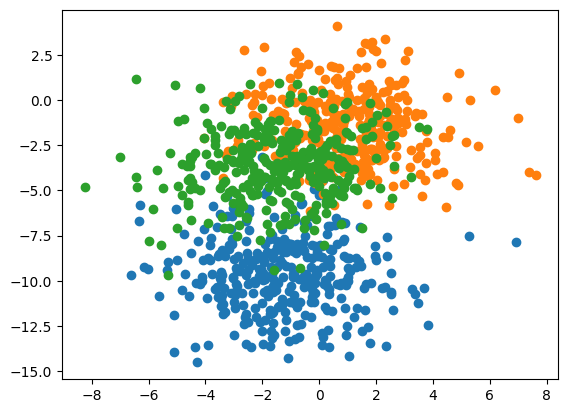

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
  # select indices of points with the class label
  row_ix = np.where(y == class_value)
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

*****Batch Stochastic Gradient Descent*****:
batch_size=len(train_)

Epoch 1/100
1/1 [==============================] - 1s 581ms/step - loss: 4.5560 - accuracy: 0.1075 - val_loss: 2.7941 - val_accuracy: 0.3818
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 3.2102 - accuracy: 0.3403 - val_loss: 2.8390 - val_accuracy: 0.3818
Epoch 3/100
1/1 [==============================] - 0s 64ms/step - loss: 3.1781 - accuracy: 0.3448 - val_loss: 2.6319 - val_accuracy: 0.4576
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 2.9429 - accuracy: 0.4522 - val_loss: 3.2359 - val_accuracy: 0.3455
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 3.3902 - accuracy: 0.3493 - val_loss: 2.5946 - val_accuracy: 0.4576
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 2.6529 - accuracy: 0.4642 - val_loss: 2.7327 - val_accuracy: 0.4424
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 2.6235 - accuracy: 0.4388 - val_loss: 2.2728 - val_accuracy: 0.4545
Epoch 8/100
1/1 [==

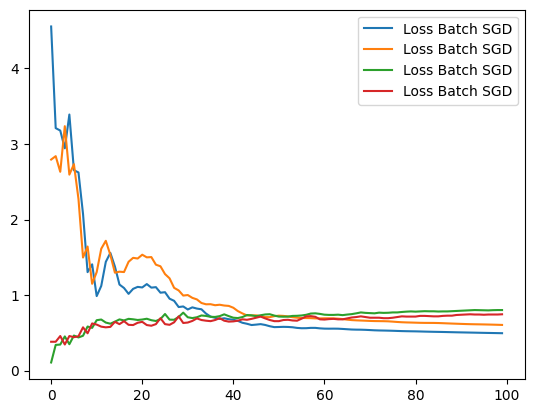

In [6]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def create_dataset():
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  # one hot encode output variable
  y = to_categorical(y, num_classes=3)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  return X_train, X_test, y_train, y_test

def evaluate_model(X_train, X_test, y_train, y_test, n_batch):
  input_dim = X_train.shape[1]
  n_classes = y_train.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(50, input_dim=input_dim, activation='relu', kernel_initializer="he_uniform"))
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model on train set
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1, batch_size=n_batch)
  # evaluate model on test set
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  return history, test_acc


X_train, X_test, y_train, y_test = create_dataset()
history, test_acc = evaluate_model(X_train, X_test, y_train, y_test, len(X_train))
plt.plot(history.history['loss'], label="Loss Batch SGD")
plt.plot(history.history['val_loss'], label="Loss Batch SGD")
plt.plot(history.history['accuracy'], label="Loss Batch SGD")
plt.plot(history.history['val_accuracy'], label="Loss Batch SGD")

# show the plot
plt.legend()
plt.show()


***Stochastic Gradient Descent***: batch_size=1

Epoch 1/100
670/670 [==============================] - 7s 9ms/step - loss: 1.4981 - accuracy: 0.5866 - val_loss: 1.0190 - val_accuracy: 0.5061
Epoch 2/100
670/670 [==============================] - 2s 2ms/step - loss: 0.9698 - accuracy: 0.5194 - val_loss: 1.2254 - val_accuracy: 0.5212
Epoch 3/100
670/670 [==============================] - 1s 2ms/step - loss: 0.9774 - accuracy: 0.5119 - val_loss: 1.0173 - val_accuracy: 0.5636
Epoch 4/100
670/670 [==============================] - 2s 3ms/step - loss: 0.9591 - accuracy: 0.5000 - val_loss: 0.9157 - val_accuracy: 0.6000
Epoch 5/100
670/670 [==============================] - 2s 3ms/step - loss: 0.8535 - accuracy: 0.6015 - val_loss: 1.1063 - val_accuracy: 0.6061
Epoch 6/100
670/670 [==============================] - 2s 3ms/step - loss: 0.8944 - accuracy: 0.5478 - val_loss: 1.0651 - val_accuracy: 0.4818
Epoch 7/100
670/670 [==============================] - 4s 6ms/step - loss: 0.9176 - accuracy: 0.5448 - val_loss: 0.9480 - val_accuracy: 0.4636

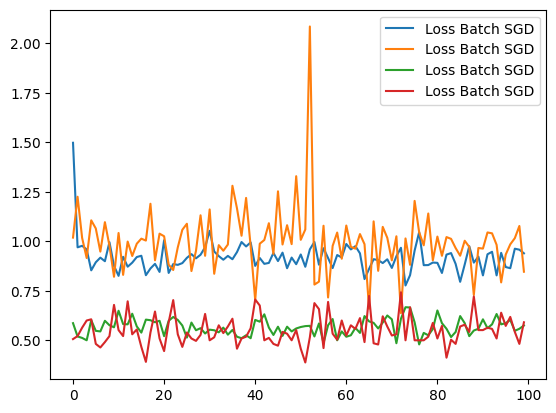

In [7]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def create_dataset():
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  # one hot encode output variable
  y = to_categorical(y, num_classes=3)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  return X_train, X_test, y_train, y_test

def evaluate_model(X_train, X_test, y_train, y_test, n_batch):
  input_dim = X_train.shape[1]
  n_classes = y_train.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(50, input_dim=input_dim, activation='relu', kernel_initializer="he_uniform"))
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model on train set
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1, batch_size=n_batch)
  # evaluate model on test set
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  return history, test_acc


X_train, X_test, y_train, y_test = create_dataset()
history, test_acc = evaluate_model(X_train, X_test, y_train, y_test, 1)
plt.plot(history.history['loss'], label="Loss Batch SGD")
plt.plot(history.history['val_loss'], label="Loss Batch SGD")
plt.plot(history.history['accuracy'], label="Loss Batch SGD")
plt.plot(history.history['val_accuracy'], label="Loss Batch SGD")

# show the plot
plt.legend()
plt.show()


***Mini batch Stochastic Gradient Descent***: batch_size<=len(train_)#32

Epoch 1/100
21/21 [==============================] - 1s 20ms/step - loss: 1.9333 - accuracy: 0.5507 - val_loss: 2.1830 - val_accuracy: 0.5727
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 1.0752 - accuracy: 0.6627 - val_loss: 0.9519 - val_accuracy: 0.6909
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.8172 - accuracy: 0.6985 - val_loss: 0.9134 - val_accuracy: 0.6182
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.7771 - accuracy: 0.6925 - val_loss: 0.7070 - val_accuracy: 0.7424
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6572 - accuracy: 0.7448 - val_loss: 0.8405 - val_accuracy: 0.6879
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5579 - accuracy: 0.7746 - val_loss: 0.6548 - val_accuracy: 0.7364
Epoch 7/100
21/21 [==============================] - 0s 9ms/step - loss: 0.5033 - accuracy: 0.7985 - val_loss: 0.5937 - val_accuracy: 0.7606
Epoch 8/100


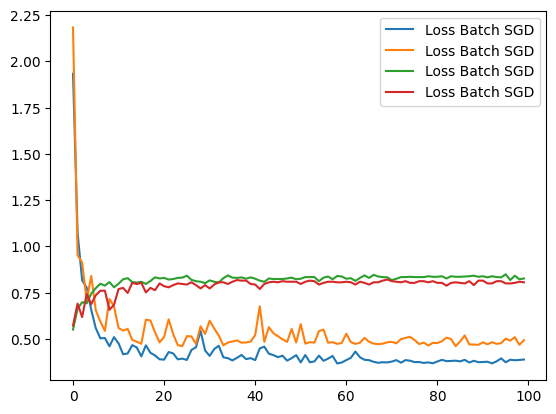

In [8]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def create_dataset():
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  # one hot encode output variable
  y = to_categorical(y, num_classes=3)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  return X_train, X_test, y_train, y_test

def evaluate_model(X_train, X_test, y_train, y_test, n_batch):
  input_dim = X_train.shape[1]
  n_classes = y_train.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(50, input_dim=input_dim, activation='relu', kernel_initializer="he_uniform"))
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model on train set
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1, batch_size=n_batch)
  # evaluate model on test set
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  return history, test_acc


X_train, X_test, y_train, y_test = create_dataset()
history, test_acc = evaluate_model(X_train, X_test, y_train, y_test, 32)
plt.plot(history.history['loss'], label="Loss Batch SGD")
plt.plot(history.history['val_loss'], label="Loss Batch SGD")
plt.plot(history.history['accuracy'], label="Loss Batch SGD")
plt.plot(history.history['val_accuracy'], label="Loss Batch SGD")

# show the plot
plt.legend()
plt.show()
